In [46]:
import pandas as pd
import numpy as np
import json
from datetime import date
import calendar
import networkx as nx


TS=date(2021,1,1)
TE=date(2021,3,1)




dic_month={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
df2=pd.read_excel("INDIA.XLSX")
dic={}
df2
df2=df2.loc[(df2['Unnamed: 5'] == "All ages") & (df2["Unnamed: 4"]=="Total")& (df2["Unnamed: 6"]=="Total")]
df2
for index, row in df2.iterrows():
    dic[row["Unnamed: 3"].lstrip("State -")[0:-5].upper()]=row["Unnamed: 7"]
dic.pop("")
#dic
dic["DELHI NCT"]=dic["NCT OF DELHI"]
dic["JAMMU AND KASHMIR"]=dic["JAMMU & KASHMIR"]
dic["SIKKIM"]=dic["IKKIM"]
dic.pop("IKKIM")
dic.pop("JAMMU & KASHMIR")
dic.pop("NCT OF DELHI")
dic



df=pd.read_csv("Scraped.csv")
x=df["5"][6]
print(x)
df
passengers=[]
for i in range(len(df)):
    temp=0
    x=df["18"][i]
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
        if temp==0:
            print(x)
            y=x
        passengers.append(temp)
passengers=list(filter(lambda a: a != 0, passengers))


def df_states(df):
    for i in range(len(df)):
        x=df["19"][i]
        x=x.strip('][').split(',')
        for j in range(1,len(x),2):
            print(x[j])
#df_states(df)




def create():
    lis=[*dic]
    df=pd.DataFrame(data=0,columns=lis, index = lis)
    return df
dfG=create()
def get_passengers(x):
    temp=0
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
    if temp>0:
        return temp
    else:
        return 1590
def get_weekdays(string):
    string=string.replace(" ","")
    #print(len(string), string)
    return len(string)
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]

def checkruns_weight(row):      #Assumption: The end date is not in 2022. And the start date is either in 2020 or 2021
    s=row[21]
    e=row[22]
    days=0
#     TS=date(2020,5,1)
#     TE=date(2020,7,31)
#     TS=date(2020,8,1)
#     TE=date(2020,10,31)

    print(s,e)
    try:
        s,years=separator(s)
        e,yeare=separator(e)
        #
        sm,sd=s.split(" ")
        em,ed=e.split(" ")
        #
        sm=dic_month[sm]
        em=dic_month[em]
        #
        date_s=date(int(years),int(sm),int(sd))
        date_e=date(int(yeare),int(em),int(ed))
        #
        #days=date_e-date_s
        if(TS>date_s):
            CS=TS
        else:
            CS=date_s
        if(TE>date_e):
            CE=date_e
        else:
            CE=TE
        
        days=CE-CS
        
    except Exception as e:
        print(e)
        days=date(2021,6,10)-date(2021,6,10)
#         try:
#             sm,sd=s.split(" ")
#             sm=dic_month[sm]
#             date_e=date(2021,6,10)
#             date_s=date(2021,int(sm),int(sd))
#             days=date_e-date_s
#         except:
#             days=date(2021,6,10)-date(2021,6,10)


    days=days.days
    if(days<0):
        days=0
    runs=days/7*get_weekdays(row[14])*get_passengers(row[19])
    return runs
                #
#get_weekdays(df.loc[0][14])
#get_passengers(df.loc[1][19])
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]
checkruns_weight(df.loc[0])


Jul 01
['  L', '', ' G1', ' G2', ' G3', ' G4', ' G5', ' G6', ' G7', ' G8', ' G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', '']
['  L', '', 'G18', 'G17', 'G16', 'G15', 'G14', 'G13', 'G12', 'G11', 'G10', ' G9', ' G8', ' G7', ' G6', ' G5', ' G4', ' G3', ' G2', ' G1', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['  L', '', ' G1', ' G2', ' G3', ' G4', ' G5', ' G6', ' G7', ' G8', ' G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', '']
['  L', '', 'G19', 'G18', 'G17', 'G16', 'G15', 'G14', 'G13', 'G12', 'G11', 'G10', ' G9', ' G8', ' G7', ' G6', ' G5', ' G4', ' G3', ' G2', ' G1', '']
Mon Jun 21, 2021 Thu Jul 01, 2021


0.0

['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Mon Jun 21, 2021 Thu Jul 01, 2021
['HARYANA', 'CHANDIGARH', 'DELHI NCT']
Mon Jun 21, 2021 nan
'float' object is not subscriptable
['DELHI NCT', 'HARYANA', 'CHANDIGARH']
Mon Jun 21, 2021 nan
'float' object is not subscriptable
['PUNJAB', 'HARYANA', 'DELHI NCT']
Fri Jul 02, 2021 nan
'float' object is not subscriptable
['DELHI NCT', 'HARYANA', 'PUNJAB']
Fri Jul 02, 2021 nan
'float' object is not subscriptable
['DELHI NCT', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
Fri Jul 02, 2021 nan
'float' object is not subscriptable
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI NCT']
Thu Jul 01, 2021 nan
'float' object is not subscriptable
['RAJASTHAN', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
Sun Jul 04, 2021 nan
'float' object is not subscriptable
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'RAJASTHAN']
Thu Jul 01, 2021 nan
'float' object is not subscriptable
['ASSAM', 'WEST 

['UTTAR PRADESH', 'RAJASTHAN', 'HARYANA']
Fri Jun 18, 2021 nan
'float' object is not subscriptable
['HARYANA', 'RAJASTHAN', 'UTTAR PRADESH']
Fri Jun 18, 2021 nan
'float' object is not subscriptable
['RAJASTHAN']
Fri Jun 18, 2021 nan
'float' object is not subscriptable
['RAJASTHAN']
Fri Jun 18, 2021 nan
'float' object is not subscriptable
['DELHI NCT', 'HARYANA', 'RAJASTHAN']
Sat Jun 19, 2021 nan
'float' object is not subscriptable
['RAJASTHAN', 'HARYANA', 'DELHI NCT']
Fri Jun 18, 2021 nan
'float' object is not subscriptable
['RAJASTHAN', 'MADHYA PRADESH']
Fri Jun 18, 2021 nan
'float' object is not subscriptable
['MADHYA PRADESH', 'RAJASTHAN']
Sat Jun 19, 2021 nan
'float' object is not subscriptable
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
Mon Jun 07, 2021 Mon Jun 21, 2021
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
Wed Jun 09, 2021 Thu Jun 17, 2021
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'M

['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
Fri Jun 11, 2021 Fri Jul 02, 2021
['BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
Thu Jun 10, 2021 Thu Jul 01, 2021
['WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA', 'GUJARAT']
Mon Jun 07, 2021 Wed Jun 30, 2021
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Thu Jul 08, 2021 nan
'float' object is not subscriptable
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
Tue Jul 06, 2021 nan
'float' object is not subscriptable
['PUNJAB', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'MAHARASHTRA']
Sat Jun 19, 2021 nan
'float' object is not subscriptable
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND']
Fri Jun 04, 2021 Sun Jun 27, 2021
['WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA']
Thu Jun 10, 2021 Sat Jun 26, 2021
['JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA']
Wed Jun 09, 2021 Fri Jun 25, 2021
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'W

['MAHARASHTRA']
Mon Oct 12, 2020 Mon May 17, 2021
['MAHARASHTRA']
Tue Oct 13, 2020 Tue May 18, 2021
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Fri May 14, 2021 Wed May 19, 2021
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
Wed May 12, 2021 Tue May 18, 2021
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Sun May 16, 2021 Mon May 17, 2021
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Fri May 14, 2021 Sun May 16, 2021
['TELANGANA', 'MAHARASHTRA']
Mon Oct 12, 2020 Tue May 18, 2021
['MAHARASHTRA', 'TELANGANA']
Sun Oct 11, 2020 Mon May 17, 2021
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Mon May 17, 2021 Sat May 22, 2021
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
Sat May 15, 2021 Fri May 21, 2021
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
Fri Apr 23, 2021 Mon May 31, 2021
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
Wed Apr 21, 2021 Sat May 29, 2021
['TELANGAN

['PUNJAB', 'RAJASTHAN']
Sun Apr 11, 2021 Tue Apr 27, 2021
['HARYANA', 'RAJASTHAN']
Mon Apr 12, 2021 Tue Apr 27, 2021
['RAJASTHAN', 'HARYANA']
Mon Apr 12, 2021 Tue Apr 27, 2021
['HARYANA', 'RAJASTHAN']
Tue Apr 13, 2021 Wed Apr 28, 2021
['RAJASTHAN', 'HARYANA']
Sun Apr 11, 2021 Wed Apr 28, 2021
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Sat May 01, 2021 Sun May 02, 2021
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Sat May 01, 2021 Mon May 03, 2021
['UTTARAKHAND', 'UTTAR PRADESH']
Mon Apr 12, 2021 Tue Apr 27, 2021
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
Wed Apr 28, 2021 Sat May 01, 2021
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Fri Apr 30, 2021 Sat May 01, 2021
['KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA']
Mon Apr 26, 2021 nan
'float' object is not subscriptable
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Tue Apr 27, 2021 Wed Apr 28, 2021
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
Fri Apr 30

Sun Apr 11, 2021 nan
'float' object is not subscriptable
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'UTTAR PRADESH']
Wed Oct 21, 2020 Fri Jul 02, 2021
['UTTAR PRADESH', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
Tue Oct 20, 2020 Thu Jul 01, 2021
['CHANDIGARH', 'HARYANA', 'UTTAR PRADESH', 'UTTARAKHAND']
Wed Oct 21, 2020 Fri Jul 02, 2021
['UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA', 'CHANDIGARH']
Tue Oct 20, 2020 Thu Jul 01, 2021
['WEST BENGAL', 'ODISHA']
Fri Oct 16, 2020 Wed Jun 30, 2021
['WEST BENGAL', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KARNATAKA']
Thu Oct 22, 2020 Wed Jun 30, 2021
['BIHAR', 'WEST BENGAL', 'JHARKHAND', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KARNATAKA']
Mon Apr 05, 2021 Wed Jun 30, 2021
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL', 'JHARKHAND', 'BIHAR']
Wed Apr 07, 2021 Sat Jul 03, 2021
['KARNATAKA', 'ANDHRA PRADESH', 'TAMIL NADU', 'ODISHA', 'WEST BENGAL']
Sat Oct 24, 2020 Thu Jul 01, 2021
['BIHAR']
Thu Sep 17, 2020 Wed Jun 30, 2021
['U

['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'GUJARAT']
Wed Nov 25, 2020 Fri Jul 02, 2021
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
Wed Jan 06, 2021 Thu Jul 01, 2021
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
Mon Oct 26, 2020 Mon Jun 28, 2021
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Thu Oct 22, 2020 Sat Jun 26, 2021
['RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
Thu Oct 22, 2020 Fri Jul 02, 2021
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN']
Wed Oct 21, 2020 Thu Jul 01, 2021
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
Wed Oct 21, 2020 Fri Jul 02, 2021
['BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
Tue Oct 20, 2020 Thu Jul 01, 2021
['TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
Tue Oct 27, 2020 Wed Jun 30, 2021
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU']
Sun Oct 25, 2020 Mon Jun 28, 2021
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'UTTAR PRAD

['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
Mon Apr 12, 2021 nan
'float' object is not subscriptable
['UTTARAKHAND', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'RAJASTHAN', 'GUJARAT']
nan nan
'float' object is not subscriptable
['ASSAM']
Sat Feb 20, 2021 nan
'float' object is not subscriptable
['RAJASTHAN', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
Mon May 10, 2021 Tue May 11, 2021
['WEST BENGAL']
nan nan
'float' object is not subscriptable
['UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
['JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
Mon Apr 19, 2021 Tue Apr 20, 2021
['ODISHA', 'ANDHRA PRADESH', 'TELANGANA', 'KARNATAKA', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
['MAHARASHTRA', 'KARNATAKA', 'TELANGANA', 'ANDHRA PRADESH', 'ODISHA']
nan nan
'float' object 

['MAHARASHTRA']
Wed Nov 04, 2020 nan
'float' object is not subscriptable
['MAHARASHTRA']
Wed Nov 04, 2020 nan
'float' object is not subscriptable
['MAHARASHTRA']
Sat Nov 14, 2020 nan
'float' object is not subscriptable
['MAHARASHTRA']
Sat Nov 14, 2020 nan
'float' object is not subscriptable
['ASSAM']
Sun May 02, 2021 nan
'float' object is not subscriptable
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'CHANDIGARH']
nan nan
'float' object is not subscriptable
['ASSAM']
nan nan
'float' object is not subscriptable
['ASSAM']
nan nan
'float' object is not subscriptable
['ASSAM']
Sun Feb 21, 2021 nan
'float' object is not subscriptable
['ASSAM']
Sat Feb 20, 2021 nan
'float' object is not subscriptable
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
nan nan
'float' object is not subscriptable
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
nan nan
'float' object is not subscriptable
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADE

['KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'DELHI NCT']
nan nan
'float' object is not subscriptable
['DELHI NCT', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA']
nan nan
'float' object is not subscriptable
['WEST BENGAL', 'JHARKHAND', 'BIHAR']
nan nan
'float' object is not subscriptable
['BIHAR', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
['CHHATTISGARH', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
['MAHARASHTRA', 'CHHATTISGARH']
nan nan
'float' object is not subscriptable
['RAJASTHAN', 'UTTAR PRADESH', 'HARYANA', 'DELHI NCT']
nan nan
'float' object is not subscriptable
['DELHI NCT', 'HARYANA', 'UTTAR PRADESH', 'RAJASTHAN']
nan nan
'float' object is not subscriptable
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'RAJASTHAN']
nan nan
'float' object is not subscriptable
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
nan nan
'float' object is not sub

['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
['BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
nan nan
'float' object is not subscriptable
['BIHAR', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA', 'TELANGANA']
nan nan
'float' object is not subscriptable
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
nan nan
'float' object is not subscriptable
['MADHYA PRADESH', 'RAJASTHAN']
nan nan
'float' object is not subscriptable
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH']
nan nan
'float' object is not subscriptable
['UTTAR PRADESH', 'RAJASTHAN']
nan nan
'float' object is not subscriptable
['MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
['RAJASTHAN', 'MADHYA PRADESH']
nan nan
'float' object is not subscriptable
['KARNATAKA', 'MAHARASHTRA', 'GUJARAT', 'RAJASTHAN']
nan nan
'float' object is not subscriptable
['RA

['ODISHA', 'WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
nan nan
'float' object is not subscriptable
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL', 'ODISHA']
nan nan
'float' object is not subscriptable
['WEST BENGAL', 'JHARKHAND', 'BIHAR']
nan nan
'float' object is not subscriptable
['BIHAR', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
['KARNATAKA', 'ANDHRA PRADESH', 'ODISHA']
nan nan
'float' object is not subscriptable
['MAHARASHTRA']
nan nan
'float' object is not subscriptable
['MAHARASHTRA']
nan nan
'float' object is not subscriptable
['MAHARASHTRA']
Fri Oct 09, 2020 Tue Apr 27, 2021
['MAHARASHTRA']
Fri Oct 09, 2020 Thu May 13, 2021
['MAHARASHTRA']
Sat Oct 10, 2020 Thu May 13, 2021
['MAHARASHTRA']
Fri Oct 09, 2020 Mon Apr 26, 2021
['MAHARASHTRA']
Fri Oct 09, 2020 Mon Apr 26, 2021
['RAJASTHAN', 'HARYANA', 'DELHI NCT']
Sat Apr 10, 2021 Mon Apr 26, 2021
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NC

['DELHI NCT', 'MADHYA PRADESH', 'UTTAR PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
['TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL']
Sat Apr 03, 2021 nan
'float' object is not subscriptable
['WEST BENGAL', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU']
Mon Apr 05, 2021 nan
'float' object is not subscriptable
['UTTAR PRADESH', 'UTTARAKHAND']
Tue Apr 13, 2021 Mon Apr 26, 2021
['UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
nan nan
'float' object is not subscriptable
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'UTTARAKHAND']
nan nan
'float' object is not subscriptable
['BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
nan nan
'float' object is not subscriptable
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'UTTARAKHAND', 'BIHAR']
nan nan
'float' object is not subscriptable
['MAHARASHTRA', 'TELANGANA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHA

['BIHAR']
nan nan
'float' object is not subscriptable
['BIHAR']
nan nan
'float' object is not subscriptable
['UTTAR PRADESH', 'UTTARAKHAND']
nan nan
'float' object is not subscriptable
['UTTARAKHAND', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
['GUJARAT', 'RAJASTHAN', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
nan nan
'float' object is not subscriptable
['BIHAR', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'RAJASTHAN', 'GUJARAT']
nan nan
'float' object is not subscriptable
['ODISHA', 'ANDHRA PRADESH']
Mon Nov 16, 2020 Fri Apr 30, 2021
['ANDHRA PRADESH', 'ODISHA']
nan nan
'float' object is not subscriptable
['ODISHA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
['MAHARASHTRA', 'GUJARAT']
nan nan
'float' object is not subscriptable
['GUJARAT', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
Sat Apr 10, 2021 nan
'float' object is not subscript

['RAJASTHAN', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA']
nan nan
'float' object is not subscriptable
['TELANGANA', 'KARNATAKA', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
['MAHARASHTRA', 'KARNATAKA', 'TELANGANA']
nan nan
'float' object is not subscriptable
['ANDHRA PRADESH', 'KARNATAKA']
nan nan
'float' object is not subscriptable
['KARNATAKA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
['ANDHRA PRADESH', 'TELANGANA', 'KARNATAKA', 'MAHARASHTRA', 'GUJARAT']
nan nan
'float' object is not subscriptable
['ANDHRA PRADESH', 'TELANGANA', 'KARNATAKA', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
['MAHARASHTRA', 'KARNATAKA', 'TELANGANA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
['GUJARAT', 'MAHARASHTRA', 'KARNATAKA', 'TELANGANA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
['KARNATAKA', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
['MAHARASHTRA', 'KARNATAKA']
nan nan
'float' object is not su

['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
nan nan
'float' object is not subscriptable
['RAJASTHAN', 'HARYANA', 'PUNJAB', 'DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Fri Apr 16, 2021 Sat May 08, 2021
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'PUNJAB', 'RAJASTHAN']
Sun Apr 18, 2021 Mon May 10, 2021
['RAJASTHAN', 'PUNJAB', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Sat Apr 10, 2021 Wed May 12, 2021
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
nan nan
'float' object is not subscriptable
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
nan nan
'float' object is not subscriptable
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
nan nan
'flo

['KARNATAKA', 'ANDHRA PRADESH', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
['ANDHRA PRADESH', 'TAMIL NADU', 'KARNATAKA']
nan nan
'float' object is not subscriptable
['KARNATAKA', 'KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA']
nan nan
'float' object is not subscriptable
['KERALA', 'PUDUCHERRY', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
['TAMIL NADU', 'KERALA', 'PUDUCHERRY']
nan nan
'float' object is not subscriptable
['TAMIL NADU', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
['ANDHRA PRADESH', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
['TAMIL NADU']
nan nan
'float' object is not subscriptable
['TAMIL NADU']
nan nan
'float' object is not subscriptable
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
['ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
nan nan
'float' object is not subsc

Mon Apr 19, 2021 nan
'float' object is not subscriptable
['TAMIL NADU']
Sat Apr 10, 2021 Wed Apr 28, 2021
['TAMIL NADU']
Sat Apr 10, 2021 Wed Apr 28, 2021
['KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA']
Sun Apr 11, 2021 nan
'float' object is not subscriptable
['MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA']
Mon Apr 12, 2021 nan
'float' object is not subscriptable
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
Thu Apr 01, 2021 nan
'float' object is not subscriptable
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH', 'TAMIL NADU']
Thu Apr 22, 2021 nan
'float' object is not subscriptable
['TAMIL NADU', 'ANDHRA PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
Tue Apr 20, 2021 nan
'float' object is not subscriptable
['TAMIL NADU', 'ANDHRA PRADESH', 'KARNATAKA']
Sat Apr 10, 2021 Tue Apr 27, 2021
['KARNATAKA', 'ANDHRA PRADESH', 'TAMIL NADU']
Sat Apr 10, 2021 Tue Apr 27, 2021
['PUDUCHERRY', 'TAMIL NADU', '

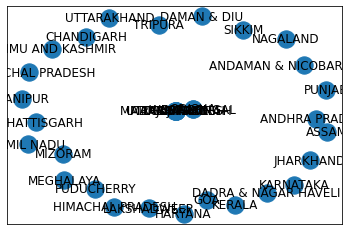

In [63]:
dfG=create()
TS=date(2020,7,1)
TE=date(2020,9,1)
for index,row in df.iterrows():                 
    x=row[20]
    x=x.strip('][').split(',')
    y=[]
    for i in range(1,len(x),2):
        var=x[i].strip(" '").upper()
        if var not in y:
            y.append(var)
        else:
            pass
    print(y)
    if "TELANGANA" in y:
        if "ANDHRA PRADESH" in y:
            y.remove("TELANGANA")
        else:
            dunno=y.index("TELANGANA")
            y[dunno]="ANDHRA PRADESH"


    temp=[]
    for i in y:
        try:
            temp.append(dic[i])
        except KeyError:
            if i =="TELANGANA":
                #temp.append(dic("ANDHRA PRADESH"))

                if "ANDHRA PRADESH" in y:
                    y.remove(i)
                else:
                    dunno=y.index("TELANGANA")
                    y[dunno]="ANDHRA PRADESH"
                    #print(y)
                    temp.append(dic["ANDHRA PRADESH"])
    lis=[sum(temp[(i):len(temp)]) for i in range(len(y))]

    capacity=checkruns_weight(row)
    for i in range(len(y)-1):
        for j in range(i+1,len(y)):
            if (i==0):
                den=lis[i]-temp[i]          #Temp is the mig inside of i and and lis is from i to len(y)
                test=y[i]
                test=temp[j]
                dfG[y[i]][y[j]]+=temp[j]*capacity/den
            else:
                den2=lis[i]-temp[i]
                mult1=capacity*temp[i]/lis[i]
                mult2=temp[j]/den2
                dfG[y[i]][y[j]]+=mult1*mult2

G=nx.from_pandas_adjacency(dfG)
nx.write_gml(G,str(TS)+"_2M.gml")
nx.draw_networkx(G)


In [64]:
dfG

,HIMACHAL PRADESH,PUNJAB,CHANDIGARH,UTTARAKHAND,HARYANA,RAJASTHAN,UTTAR PRADESH,BIHAR,ARUNACHAL PRADESH,NAGALAND,...,KARNATAKA,GOA,LAKSHADWEEP,KERALA,TAMIL NADU,PUDUCHERRY,ANDAMAN & NICOBAR ISLANDS,DELHI NCT,JAMMU AND KASHMIR,SIKKIM
HIMACHAL PRADESH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PUNJAB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHANDIGARH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UTTARAKHAND,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HARYANA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RAJASTHAN,0,0,0,0,0,0,2351,7392,0,0,...,0,0,0,0,0,0,0,28821,0,0
UTTAR PRADESH,0,0,0,0,0,10455,0,14757,0,0,...,0,0,0,0,0,0,0,0,0,0
BIHAR,0,0,0,0,0,5012,41334,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NAGALAND,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
